In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score
from PIL import Image
import os

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


#  DATA PREPROCESSING

In [14]:
def convert_jpg_to_png(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate over each file in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg"):
            # Open the JPEG image
            img = Image.open(os.path.join(input_folder, filename))

            # Remove the file extension from the filename
            filename_without_ext = os.path.splitext(filename)[0]

            # Convert and save the image as PNG
            output_path = os.path.join(output_folder, filename_without_ext + ".png")
            img.save(output_path, "PNG")
            print(f"Converted {filename} to {output_path}")

    print("Conversion complete.")

In [15]:
raw_data_directory = "./RAW"

for folder in os.listdir(raw_data_directory):
    output_folder = os.path.join(data_directory,folder)
    convert_jpg_to_png(os.path.join(raw_data_directory,folder), output_folder)

Converted 0--ayam-bakar-padang-1-ekor.jpg to ./dataset\ayam_panggang_padang\0--ayam-bakar-padang-1-ekor.png
Converted 05f344f0-dd67-4515-b7f9-e26652c505ad.jpg to ./dataset\ayam_panggang_padang\05f344f0-dd67-4515-b7f9-e26652c505ad.png
Converted 0ba2c40b-d351-40ff-9860-b70428d333d8.jpg to ./dataset\ayam_panggang_padang\0ba2c40b-d351-40ff-9860-b70428d333d8.png
Converted 1603430802_1-org.jpg to ./dataset\ayam_panggang_padang\1603430802_1-org.png
Converted 177297_9e9332fc-19e1-48f1-8f17-8c28dcbe7d48_509_509.jpg to ./dataset\ayam_panggang_padang\177297_9e9332fc-19e1-48f1-8f17-8c28dcbe7d48_509_509.png
Converted 1851278485.jpg to ./dataset\ayam_panggang_padang\1851278485.png
Converted 2.jpg to ./dataset\ayam_panggang_padang\2.png
Converted 2116126550.jpg to ./dataset\ayam_panggang_padang\2116126550.png
Converted 2601450440.jpg to ./dataset\ayam_panggang_padang\2601450440.png
Converted 2903683984.jpg to ./dataset\ayam_panggang_padang\2903683984.png
Converted 3316163_5nWBXMtLp_z_fpwElR_Mn0amV_2T

Converted 20230323_191608JPG-1114583084.jpg to ./dataset\daun_singkong_padang\20230323_191608JPG-1114583084.png
Converted 2637551418.jpg to ./dataset\daun_singkong_padang\2637551418.png
Converted 2743487610.jpg to ./dataset\daun_singkong_padang\2743487610.png
Converted 2759518894.jpg to ./dataset\daun_singkong_padang\2759518894.png
Converted 281554c5-8902-48ec-b25f-5f84f82a37fe.jpg to ./dataset\daun_singkong_padang\281554c5-8902-48ec-b25f-5f84f82a37fe.png
Converted 3113557221.jpg to ./dataset\daun_singkong_padang\3113557221.png
Converted 3366310654.jpg to ./dataset\daun_singkong_padang\3366310654.png
Converted 3824586490.jpg to ./dataset\daun_singkong_padang\3824586490.png
Converted 4075349670.jpg to ./dataset\daun_singkong_padang\4075349670.png
Converted 4228756228.jpg to ./dataset\daun_singkong_padang\4228756228.png
Converted 522164973.jpg to ./dataset\daun_singkong_padang\522164973.png
Converted 5912c9974d67e-resep-membuat-gulai-daun-singkong-khas-padang-.jpg to ./dataset\daun_singk

Converted 98c27b7cd976fdf1069cc4eefb343da2.jpg to ./dataset\gulai_ayam_padang\98c27b7cd976fdf1069cc4eefb343da2.png
Converted avCrewLfwgmA15J0tMzQCk9Spc1Xsrd2-31363238353036333532d41d8cd.jpg to ./dataset\gulai_ayam_padang\avCrewLfwgmA15J0tMzQCk9Spc1Xsrd2-31363238353036333532d41d8cd.png
Converted ayam-gulai-khas-padang-simpel-dan-super-enak-foto-resep-utam.jpg to ./dataset\gulai_ayam_padang\ayam-gulai-khas-padang-simpel-dan-super-enak-foto-resep-utam.png
Converted ayam-kalio.jpg to ./dataset\gulai_ayam_padang\ayam-kalio.png
Converted ayam-padang.jpg to ./dataset\gulai_ayam_padang\ayam-padang.png
Converted b32ddbdc26ba15154fa8fcebe11014ba.jpg to ./dataset\gulai_ayam_padang\b32ddbdc26ba15154fa8fcebe11014ba.png
Converted ca1874d5021252265810e72bbc9a9d22gulaiayam.jpg to ./dataset\gulai_ayam_padang\ca1874d5021252265810e72bbc9a9d22gulaiayam.png
Converted d900c42c59a153dea996bacd1720cd39a4731ffe.jpg to ./dataset\gulai_ayam_padang\d900c42c59a153dea996bacd1720cd39a4731ffe.png
Converted dhiny_gall

Converted 991b4eb4-0b60-4a9a-93d7-7e35430d17d1.jpg to ./dataset\gulai_cumi_padang\991b4eb4-0b60-4a9a-93d7-7e35430d17d1.png
Converted a52f96a5c71b10428c913e1d80c20433--tahu-isis.jpg to ./dataset\gulai_cumi_padang\a52f96a5c71b10428c913e1d80c20433--tahu-isis.png
Converted Best_Seller_Gulai_Cumi.jpg to ./dataset\gulai_cumi_padang\Best_Seller_Gulai_Cumi.png
Converted cumi-isi-tahu.jpg to ./dataset\gulai_cumi_padang\cumi-isi-tahu.png
Converted fromandroid-65dac79cd9894208dfe3908c83c481fb.jpg to ./dataset\gulai_cumi_padang\fromandroid-65dac79cd9894208dfe3908c83c481fb.png
Converted fromandroid-7686d3f1cc5d94f10b42c8ec07c46fa3_600x400.jpg to ./dataset\gulai_cumi_padang\fromandroid-7686d3f1cc5d94f10b42c8ec07c46fa3_600x400.png
Converted fromandroid-7686d3f1cc5d94f10b42c8ec07c46fa3_wm_600x315.jpg to ./dataset\gulai_cumi_padang\fromandroid-7686d3f1cc5d94f10b42c8ec07c46fa3_wm_600x315.png
Converted fromandroid-ea9c827e70a5e155fa80df9c7996202b.jpg to ./dataset\gulai_cumi_padang\fromandroid-ea9c827e70a

Converted img681-1622193638.jpg to ./dataset\kerupuk_kulit_padang\img681-1622193638.png
Converted img682-1622193643.jpg to ./dataset\kerupuk_kulit_padang\img682-1622193643.png
Converted img684-1622193653.jpg to ./dataset\kerupuk_kulit_padang\img684-1622193653.png
Converted img760-1624028814.jpg to ./dataset\kerupuk_kulit_padang\img760-1624028814.png
Converted img983-1678332975.jpg to ./dataset\kerupuk_kulit_padang\img983-1678332975.png
Converted img_0600.jpg to ./dataset\kerupuk_kulit_padang\img_0600.png
Converted IMG_20221029_090133.jpg to ./dataset\kerupuk_kulit_padang\IMG_20221029_090133.png
Converted indonesia-cracker-padang-kerupuk-kulit-260nw-2295530447.jpg to ./dataset\kerupuk_kulit_padang\indonesia-cracker-padang-kerupuk-kulit-260nw-2295530447.png
Converted kerupuk kulit goreng menengah nelly-500x500.jpg to ./dataset\kerupuk_kulit_padang\kerupuk kulit goreng menengah nelly-500x500.png
Converted kerupuk kulit mentah batusangkar-500x500.jpg to ./dataset\kerupuk_kulit_padang\kerup

Converted perkedel-kentang-dapur-siena.jpg to ./dataset\perkedel_kentang_padang\perkedel-kentang-dapur-siena.png
Converted perkedel-kentang-enak-seperti-di-rumah-makan-Padang.jpg to ./dataset\perkedel_kentang_padang\perkedel-kentang-enak-seperti-di-rumah-makan-Padang.png
Converted Perkedel-Kentang-Enak-Tidak-Hancur-600x308.jpg to ./dataset\perkedel_kentang_padang\Perkedel-Kentang-Enak-Tidak-Hancur-600x308.png
Converted perkedel-kentang-khas-minang-isi-telur-foto-resep-utama.jpg to ./dataset\perkedel_kentang_padang\perkedel-kentang-khas-minang-isi-telur-foto-resep-utama.png
Converted perkedel-kentang-khas-padang-foto-resep-utama.jpg to ./dataset\perkedel_kentang_padang\perkedel-kentang-khas-padang-foto-resep-utama.png
Converted perkedel-kentang-padang (1).jpg to ./dataset\perkedel_kentang_padang\perkedel-kentang-padang (1).png
Converted perkedel-kentang-padang-240x300.jpg to ./dataset\perkedel_kentang_padang\perkedel-kentang-padang-240x300.png
Converted perkedel-kentang-padang-anti-gaga

Converted maxresdefault (1).jpg to ./dataset\sambal_ijo_padang\maxresdefault (1).png
Converted maxresdefault (3).jpg to ./dataset\sambal_ijo_padang\maxresdefault (3).png
Converted maxresdefault(1).jpg to ./dataset\sambal_ijo_padang\maxresdefault(1).png
Converted maxresdefault.jpg to ./dataset\sambal_ijo_padang\maxresdefault.png
Converted nedlpuau70.jpg to ./dataset\sambal_ijo_padang\nedlpuau70.png
Converted nina-sambal-ijo-1336728615.jpg to ./dataset\sambal_ijo_padang\nina-sambal-ijo-1336728615.png
Converted photo (1).jpg to ./dataset\sambal_ijo_padang\photo (1).png
Converted photo (2).jpg to ./dataset\sambal_ijo_padang\photo (2).png
Converted photo (3).jpg to ./dataset\sambal_ijo_padang\photo (3).png
Converted photo (4).jpg to ./dataset\sambal_ijo_padang\photo (4).png
Converted photo (5).jpg to ./dataset\sambal_ijo_padang\photo (5).png
Converted photo (6).jpg to ./dataset\sambal_ijo_padang\photo (6).png
Converted photo.jpg to ./dataset\sambal_ijo_padang\photo.png
Converted Resep-Ayam-

Converted maxresdefault.jpg to ./dataset\sayur_nangka_padang\maxresdefault.png
Converted NEYgFaSZt5Nld1YzNRrMr7cu4dXz81FF-31353936363135343130d41d8cd.jpg to ./dataset\sayur_nangka_padang\NEYgFaSZt5Nld1YzNRrMr7cu4dXz81FF-31353936363135343130d41d8cd.png
Converted photo (1).jpg to ./dataset\sayur_nangka_padang\photo (1).png
Converted photo (2).jpg to ./dataset\sayur_nangka_padang\photo (2).png
Converted photo (3).jpg to ./dataset\sayur_nangka_padang\photo (3).png
Converted photo (4).jpg to ./dataset\sayur_nangka_padang\photo (4).png
Converted photo (5).jpg to ./dataset\sayur_nangka_padang\photo (5).png
Converted photo (6).jpg to ./dataset\sayur_nangka_padang\photo (6).png
Converted photo (7).jpg to ./dataset\sayur_nangka_padang\photo (7).png
Converted photo (8).jpg to ./dataset\sayur_nangka_padang\photo (8).png
Converted photo.jpg to ./dataset\sayur_nangka_padang\photo.png
Converted resep-gulai-nangka-600x400.jpg to ./dataset\sayur_nangka_padang\resep-gulai-nangka-600x400.png
Converted re

# LOAD DATASET

In [19]:
img_height = 224
img_width = 224
data_directory = "./dataset"
batch_size = 32
train= tf.keras.utils.image_dataset_from_directory(
   data_directory,
   validation_split=0.3,
   subset="training",
   seed=42, 
   image_size=(img_height, img_width),
   batch_size=batch_size,
   labels="inferred",
   label_mode="categorical",
   color_mode="rgb")
test= tf.keras.utils.image_dataset_from_directory(
   data_directory,
   validation_split=0.3,
   subset="validation",
   seed=42, 
   image_size=(img_height, img_width),
   batch_size=batch_size,
   labels="inferred",
   label_mode="categorical",
   color_mode="rgb")


Found 1515 files belonging to 17 classes.
Using 1061 files for training.
Found 1515 files belonging to 17 classes.
Using 454 files for validation.


# LOAD BASEMODEL

In [20]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet")
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_6 (Rescaling)        (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_3 (Normalization  (None, None, None,   7          ['rescaling_6[0][0]']            
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 4,007,548
Non-trainable params: 42,023
__________________________________________________________________________________________________


In [21]:
image_batch, label_batch = next(iter(train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


# MODEL

In [22]:
base_model.trainable = False

In [23]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [29]:
prediction_layer = tf.keras.layers.Dense(17)
activation_pred = tf.keras.layers.Softmax()
prediction_batch = prediction_layer(feature_batch_average)
prediction_batch = activation_pred(prediction_batch)
print(prediction_batch.shape)

(32, 17)


In [30]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = prediction_layer(x)
outputs = activation_pred(x)
model = tf.keras.Model(inputs, outputs)

# COMPILE MODEL & TRAIN

In [31]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 17)                21777     
                                                                 
 softmax_1 (Softmax)         (None, 17)                0         
                                                           

In [33]:
initial_epochs = 100

loss0, accuracy0 = model.evaluate(test)

15/15 [==============================] - 13s 433ms/step - loss: 2.9130 - accuracy: 0.0529


In [34]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.91
initial accuracy: 0.05


In [35]:
earlystopping = EarlyStopping(
    monitor = 'val_accuracy', 
    verbose = 1, 
    patience = 5
)

# save the best model with lower loss
Best = ModelCheckpoint(
    filepath = "weights.hdf5", 
    verbose = 1, 
    save_best_only = True
    #include_optimizer=False
)

In [36]:
history = model.fit(train,
                    epochs=initial_epochs,
                    validation_data=test,
                   callbacks =[earlystopping])

Epoch 1/100
34/34 [==============================] - 13s 163ms/step - loss: 2.8193 - accuracy: 0.0905 - val_loss: 2.7292 - val_accuracy: 0.1233
Epoch 2/100
34/34 [==============================] - 6s 145ms/step - loss: 2.6413 - accuracy: 0.1810 - val_loss: 2.5732 - val_accuracy: 0.2313
Epoch 3/100
34/34 [==============================] - 6s 147ms/step - loss: 2.4771 - accuracy: 0.2846 - val_loss: 2.4337 - val_accuracy: 0.3062
Epoch 4/100
34/34 [==============================] - 6s 147ms/step - loss: 2.3400 - accuracy: 0.3544 - val_loss: 2.3048 - val_accuracy: 0.3899
Epoch 5/100
34/34 [==============================] - 6s 147ms/step - loss: 2.2050 - accuracy: 0.4166 - val_loss: 2.1882 - val_accuracy: 0.4427
Epoch 6/100
34/34 [==============================] - 6s 147ms/step - loss: 2.0856 - accuracy: 0.4665 - val_loss: 2.0789 - val_accuracy: 0.4868
Epoch 7/100
34/34 [==============================] - 6s 148ms/step - loss: 1.9728 - accuracy: 0.5156 - val_loss: 1.9807 - val_accuracy: 0.546

Epoch 58/100
34/34 [==============================] - 6s 149ms/step - loss: 0.5046 - accuracy: 0.9161 - val_loss: 0.6893 - val_accuracy: 0.8392
Epoch 59/100
34/34 [==============================] - 6s 149ms/step - loss: 0.4923 - accuracy: 0.9180 - val_loss: 0.6845 - val_accuracy: 0.8370
Epoch 60/100
34/34 [==============================] - 6s 148ms/step - loss: 0.4878 - accuracy: 0.9152 - val_loss: 0.6787 - val_accuracy: 0.8392
Epoch 61/100
34/34 [==============================] - 6s 149ms/step - loss: 0.4876 - accuracy: 0.9086 - val_loss: 0.6734 - val_accuracy: 0.8392
Epoch 62/100
34/34 [==============================] - 6s 149ms/step - loss: 0.4807 - accuracy: 0.9161 - val_loss: 0.6685 - val_accuracy: 0.8392
Epoch 62: early stopping


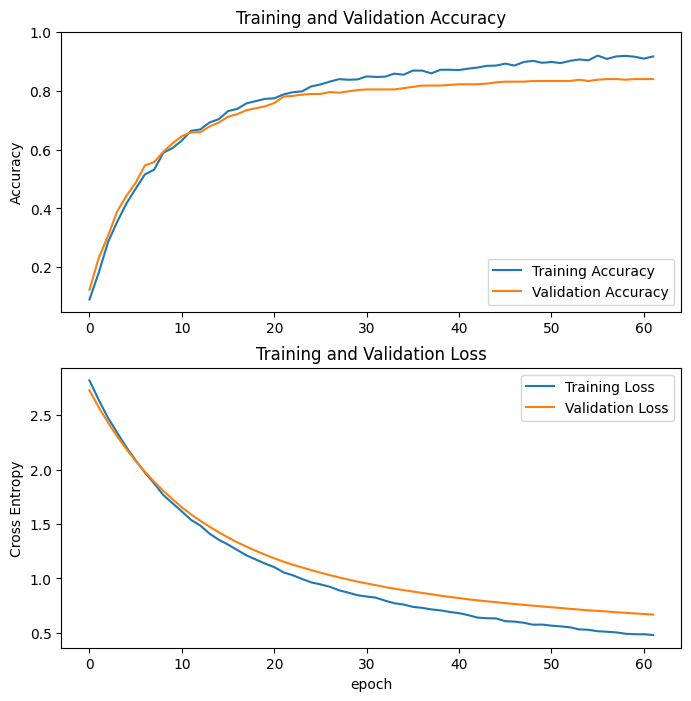

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# FINE TUNING

In [38]:
base_model.trainable = True

In [39]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  238


In [40]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 17)                21777     
                                                                 
 softmax_1 (Softmax)         (None, 17)                0         
                                                           

In [42]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=test)


Epoch 62/105
34/34 [==============================] - 24s 313ms/step - loss: 0.6838 - accuracy: 0.9161 - val_loss: 0.6860 - val_accuracy: 0.8414
Epoch 63/105
34/34 [==============================] - 9s 246ms/step - loss: 0.6810 - accuracy: 0.9312 - val_loss: 0.6843 - val_accuracy: 0.8436
Epoch 64/105
34/34 [==============================] - 9s 248ms/step - loss: 0.6796 - accuracy: 0.9303 - val_loss: 0.6832 - val_accuracy: 0.8568
Epoch 65/105
34/34 [==============================] - 9s 247ms/step - loss: 0.6785 - accuracy: 0.9378 - val_loss: 0.6825 - val_accuracy: 0.8568
Epoch 66/105
34/34 [==============================] - 9s 250ms/step - loss: 0.6775 - accuracy: 0.9444 - val_loss: 0.6818 - val_accuracy: 0.8744
Epoch 67/105
34/34 [==============================] - 9s 252ms/step - loss: 0.6768 - accuracy: 0.9500 - val_loss: 0.6813 - val_accuracy: 0.8700
Epoch 68/105
34/34 [==============================] - 9s 251ms/step - loss: 0.6761 - accuracy: 0.9548 - val_loss: 0.6809 - val_accuracy

In [44]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

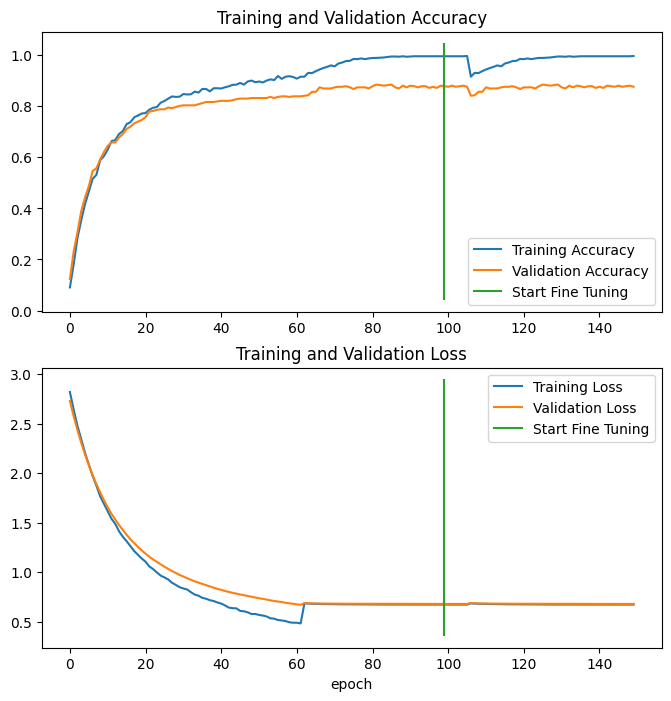

In [45]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
# plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


# EVALUATION

In [46]:
loss, accuracy = model.evaluate(test)
print('Test accuracy :', accuracy)

15/15 [==============================] - 2s 90ms/step - loss: 0.6780 - accuracy: 0.8767
Test accuracy : 0.87665194272995


In [47]:
# F1 Score
f1 = f1_score(true_labels, predicted_labels)
print("F1 score:", f1)

NameError: name 'true_labels' is not defined

Predictions:
 [ 1 16  0  8  2  1  6  9 15  8  6  9  2  8  6 15 16  9  6  5  8 12 15  9
 16 10  7 15  1  3  0 13]
Labels:
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 

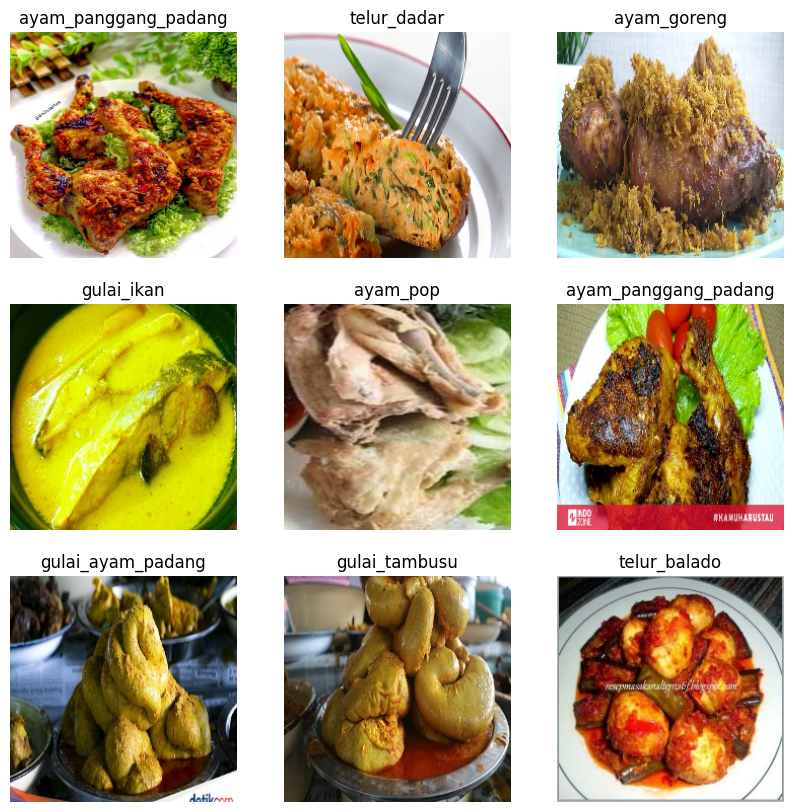

In [48]:
# Retrieve a batch of images from the test set
class_names = train.class_names
image_batch, label_batch = test.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.argmax(predictions, axis=1)


print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")


In [3]:
model.save("./savedModel1.h5")

NameError: name 'model' is not defined

# REGRESSION FOR PREDICTING CALORIE

In [7]:
import pandas as pd
csv_path = r'C:\Users\Rizvi Mahendra\Downloads\BANGKIT MODEL\DATASET SEHAT\KANTIN_SEHAT_DATASET_DATASET.csv'
data = pd.read_csv(csv_path)

In [ ]:
target_label = 